<a href="https://colab.research.google.com/github/drunni/linearAlgebra/blob/main/%5B04%EC%8B%A4%EC%8A%B5%5DMatrix_Decompositions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [24]:
plt.rcParams["figure.figsize"] = (10, 10)
origin2D = np.array([0,0])
origin3D = np.array([0,0,0])
scale = 10

###(행)벡터, 열벡터

In [25]:
print(np.array([1,0]))
print(np.hstack([1,0]))
print(np.vstack([1,0]))

[1 0]
[1 0]
[[1]
 [0]]


# 4.1 Determinant & Trace

## 4.1.1 Determinant: 면적(2D)/ 부피(3D 이상) 측정 도구

### 1) The area of the parallelogram spanned by the vectors b** and **g is |det(b, g)|

A: 
[[1 0]
 [0 1]] 

det(A): 
1.0


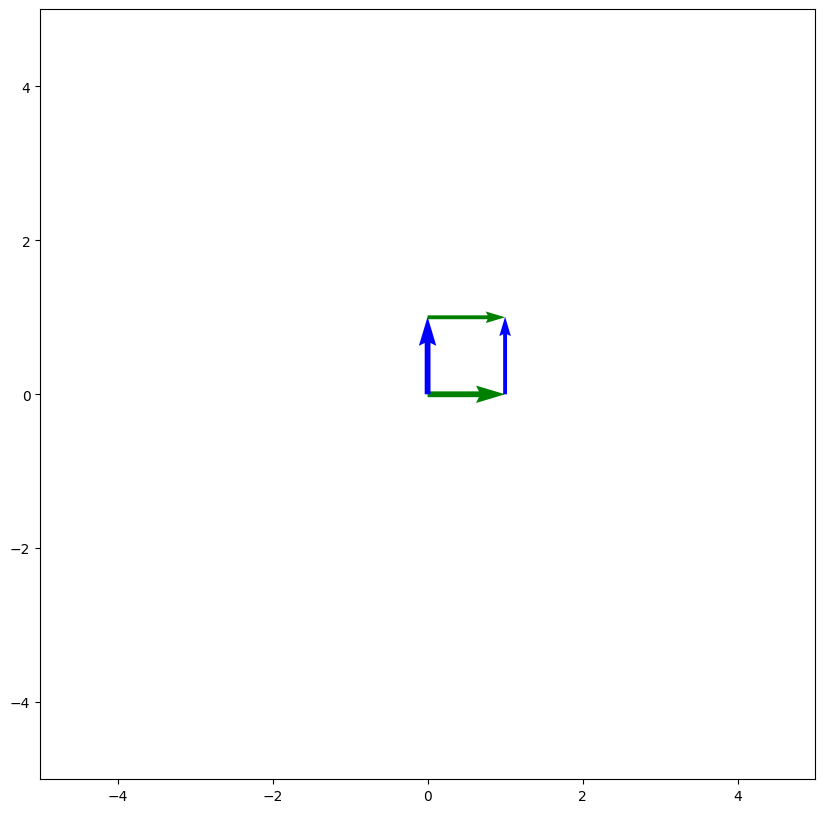

In [26]:
g = np.vstack([1,0])
b = np.vstack([0,1])

A = np.hstack([g,b])

print("A: ")
print(A, "\n")

print("det(A): ")
print(npl.det(A))

plt.axis([-scale/2, scale/2, -scale/2, scale/2])

plt.quiver(origin2D[0], origin2D[1], g[0], g[1], scale = scale, color = "g")
plt.quiver(origin2D[0], origin2D[1], b[0], b[1], scale = scale, color = "b")
plt.quiver(g[0], g[1], b[0], b[1], scale = scale, width = 0.005, color = "b")
plt.quiver(b[0], b[1],g[0], g[1], scale = scale, width = 0.005, color = "g")

plt.show()

### 2) The volume of the paralellepiped spanned by the vectors r,b,g is |det([r,g,b])|

In [27]:
r = np.vstack([2,0,-8])
g = np.vstack([6,1,0])
b = np.vstack([1,4,-1])

A = np.hstack([r,g,b])
print("A: ")
print(A, "\n")

print("det(A): ")
print(npl.det(A))

A: 
[[ 2  6  1]
 [ 0  1  4]
 [-8  0 -1]] 

det(A): 
-185.99999999999991


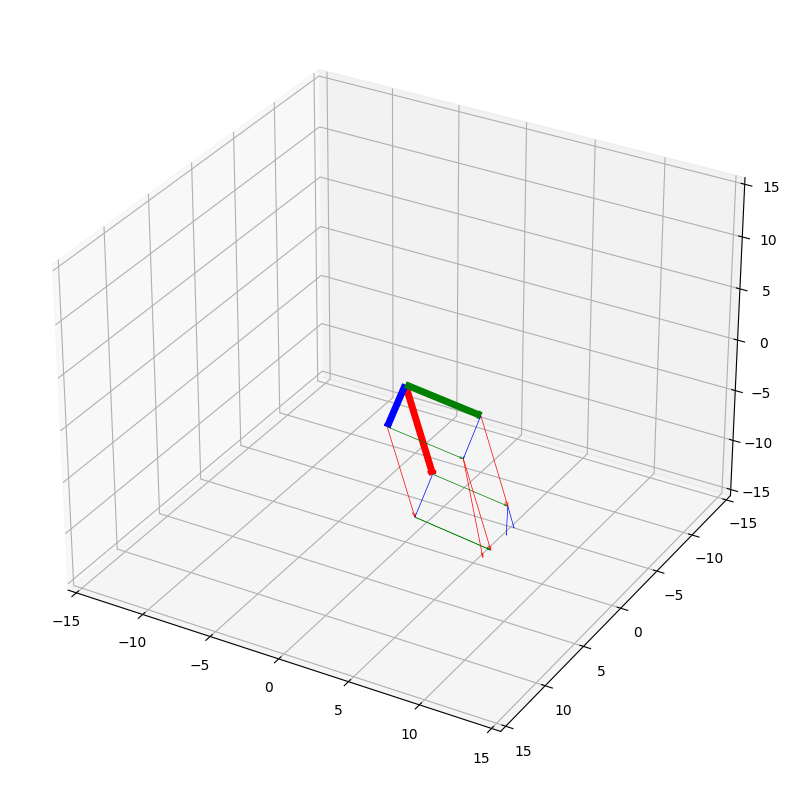

In [30]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection="3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,0], A[1,0], A[2,0], color="r", linewidths=5, arrow_length_ratio=.05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,1], A[1,1], A[2,1], color="g", linewidths=5, arrow_length_ratio=.05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,2], A[1,2], A[2,2], color="b", linewidths=5, arrow_length_ratio=.05)

import itertools as it
quiverkey = dict(linewidths=.5, arrow_length_ratio=.05, label="_nolegend_")
c = ["r", "g", "b"]

for i in [i for i in list(it.product([0,1,2], repeat=2)) if i[0] != i[1]]:
  ax.quiver(A[0, i[0]], A[1, i[0]], A[2, i[0]], A[0, i[1]], A[1, i[1]], A[2, i[1]], color = c[i[1]], **quiverkey)

ax.quiver(A[0,1]+A[0,2], A[1,1]+A[1,2], A[2,1]+A[2,2], A[0,0], [1,0], A[2,0], color="r", **quiverkey)
ax.quiver(A[0,2]+A[0,0], A[1,2]+A[1,0], A[2,2]+A[2,0], A[0,1], [1,1], A[2,1], color="g", **quiverkey)
ax.quiver(A[0,0]+A[0,1], A[1,0]+A[1,1], A[2,0]+A[2,1], A[0,2], [1,2], A[2,2], color="b", **quiverkey)

plt.show()

## 4.1.3 Trace

In [16]:
A = np.array([[3,4,-8], [1,3,7], [6,-11,2]])

print("A: ")
print(A, "\n")

print("Trace(A): ")
print(np.trace(A))

A: 
[[  3   4  -8]
 [  1   3   7]
 [  6 -11   2]] 

Trace(A): 
8


In [18]:
x = np.vstack([3,-1])
y = np.vstack([8,5])

print("tr(xy^T): ")
yt = np.transpose(y)
print(np.trace(x.dot(yt)))

print("x^Ty: ")
xt = np.transpose(x)
print(xt.dot(y))

tr(xy^T): 
19
x^Ty: 
[[19]]


# 4.2 Cholesky decomposition

In [21]:
A = np.vstack([[3,2,2], [2,3,2], [2,2,3]])

print("A: ")
print(A)

print("Choleksy(A): L")
print(npl.cholesky(A))

print("L^T")
print(np.transpose(npl.cholesky(A)))

A: 
[[3 2 2]
 [2 3 2]
 [2 2 3]]
Choleksy(A): L
[[1.73205081 0.         0.        ]
 [1.15470054 1.29099445 0.        ]
 [1.15470054 0.51639778 1.18321596]]
L^T
[[1.73205081 1.15470054 1.15470054]
 [0.         1.29099445 0.51639778]
 [0.         0.         1.18321596]]


# 4.3 Eigendecomposition: Eigenvalues & eigenvectors

### 1) eigenvalues & eigenvector of A
Au = λu

In [22]:
A = np.vstack([[4,2], [1,3]])
print("A: ")
print(A, "\n")

e_values, e_vectors = npl.eig(A)
print(e_values)
print(e_vectors)

u1 = np.vstack(e_vectors[:, 0])
u2 = np.vstack(e_vectors[:, 1])
print("u1: ", u1)
print("u2: ", u2)

l1, l2 = e_values[0], e_values[1]
print("eigen vlaues: ", l1, l2, "\n")

print("Au1: ", np.dot(A, u1))
print("l1*u1: ", l1*u1)

print("Au2: ", np.dot(A, u2))
print("l2*u2: ", l2*u2)

A: 
[[4 2]
 [1 3]] 

[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
u1:  [[0.89442719]
 [0.4472136 ]]
u2:  [[-0.70710678]
 [ 0.70710678]]
eigen vlaues:  5.0 2.0 

Au1:  [[4.47213595]
 [2.23606798]]
l1*u1:  [[4.47213595]
 [2.23606798]]
Au2:  [[-1.41421356]
 [ 1.41421356]]
l2*u2:  [[-1.41421356]
 [ 1.41421356]]


# 4.4 Singular Value Decomposition (SVD)

### 1) Stonehenge 이미지 파일 파악

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=960x635 at 0x7FDF5C1CBC70>
PNG
RGBA
(960, 635)


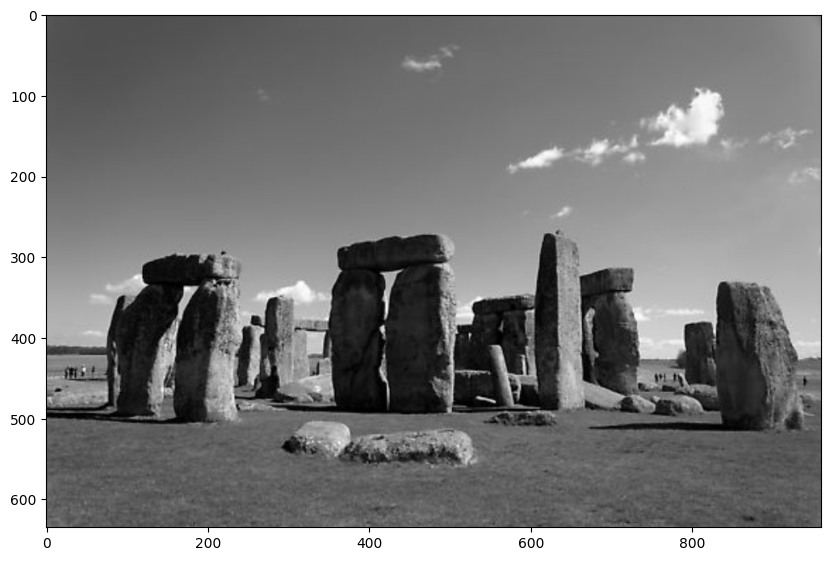

In [33]:
stonehenge = Image.open('stonehenge.png')
print(stonehenge)
print(stonehenge.format)
print(stonehenge.mode)
print(stonehenge.size)

plt.imshow(stonehenge)
plt.show()

### 2) 픽셀값 0~1 사이로 만들기

In [34]:
imMatrix = np.array(stonehenge.convert("L"))/255.0
print(imMatrix.shape)
print(imMatrix)

(635, 960)
[[0.35294118 0.34509804 0.3372549  ... 0.48627451 0.46666667 0.48627451]
 [0.32156863 0.32941176 0.31372549 ... 0.47843137 0.45098039 0.4627451 ]
 [0.34117647 0.37647059 0.34117647 ... 0.49019608 0.47058824 0.47058824]
 ...
 [0.41568627 0.41568627 0.41960784 ... 0.39215686 0.39215686 0.4       ]
 [0.42352941 0.43137255 0.42745098 ... 0.38431373 0.39607843 0.4       ]
 [0.43137255 0.45098039 0.42745098 ... 0.37254902 0.39607843 0.39607843]]


### 3) SVD 수행

(635, 635) (635, 960) (960, 960)
True


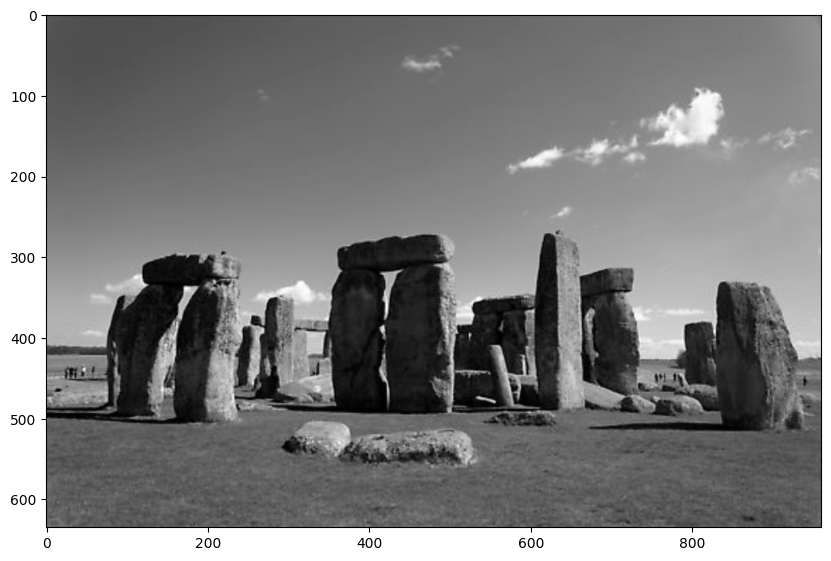

In [35]:
scalar = 1/2
shape = np.shape(imMatrix)
U,S,V = npl.svd(imMatrix)

Sd = np.hstack([np.eye(shape[0])*S.copy(), np.zeros((shape[0], shape[1]-shape[0]))])
print(np.shape(U), np.shape(Sd), np.shape(V))

usv = U @ Sd @ V
print(np.allclose(imMatrix, usv))

plt.imshow(usv, cmap='gray')
plt.show()

### 4) Ai 시각화

(635, 1)
(1, 1)
(1, 960)
2 [(635, 960), (635, 635), (635, 960), (960, 960)]
1595 609600 0.002616469816272966


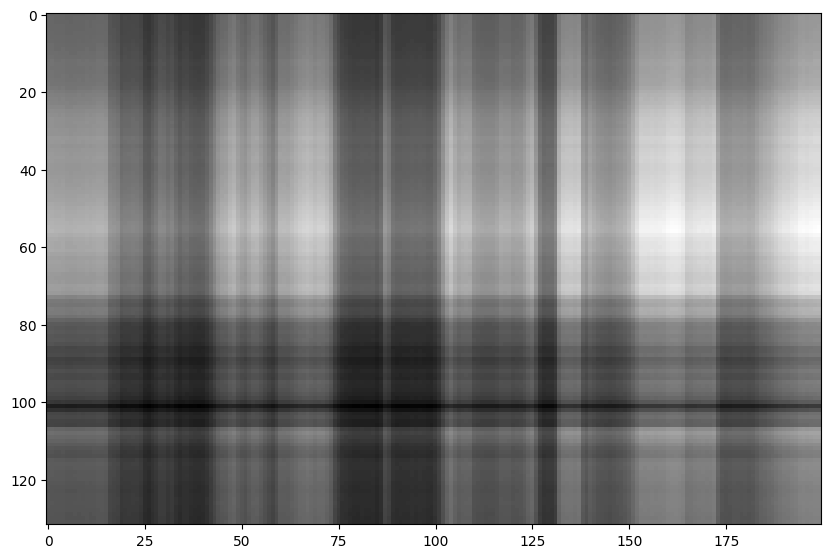

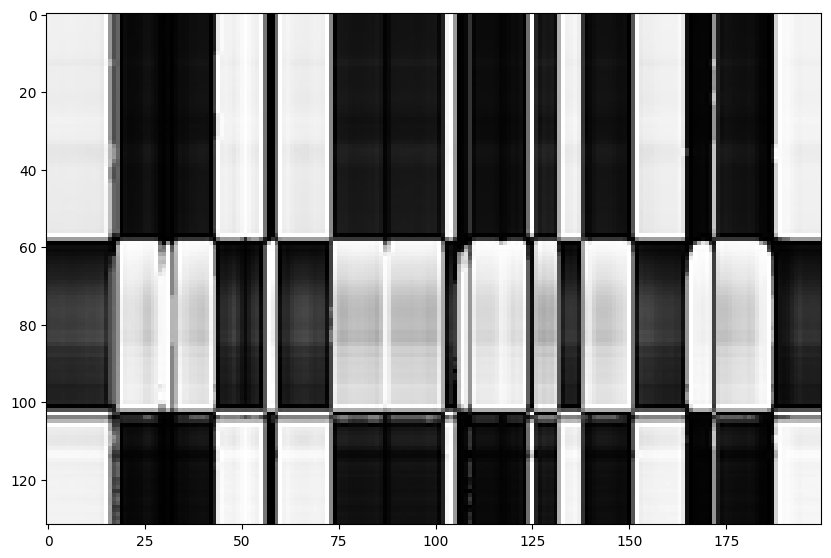

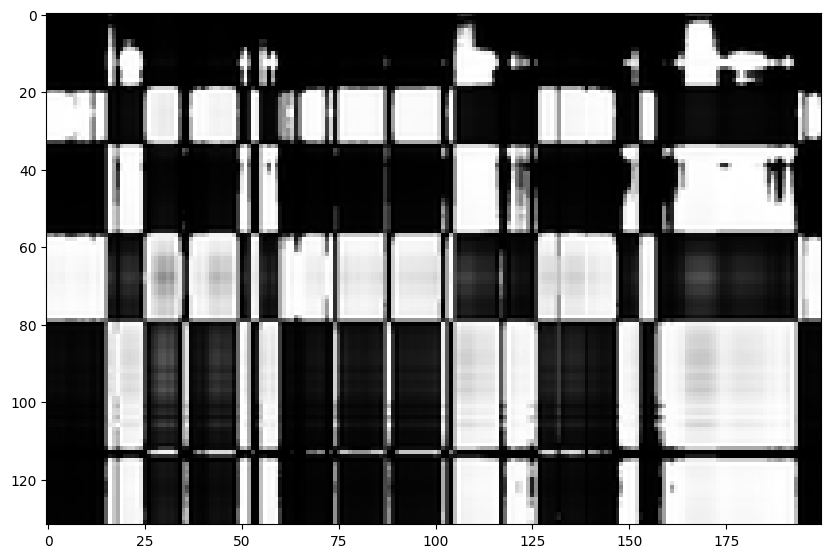

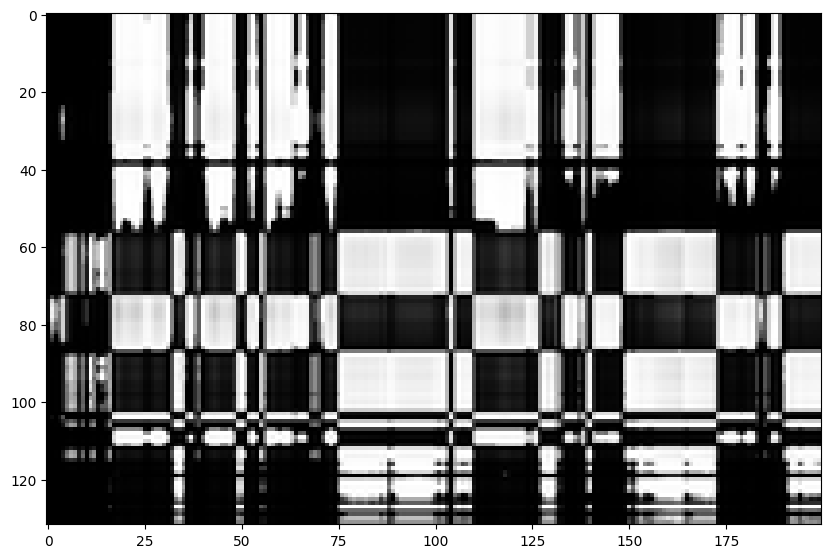

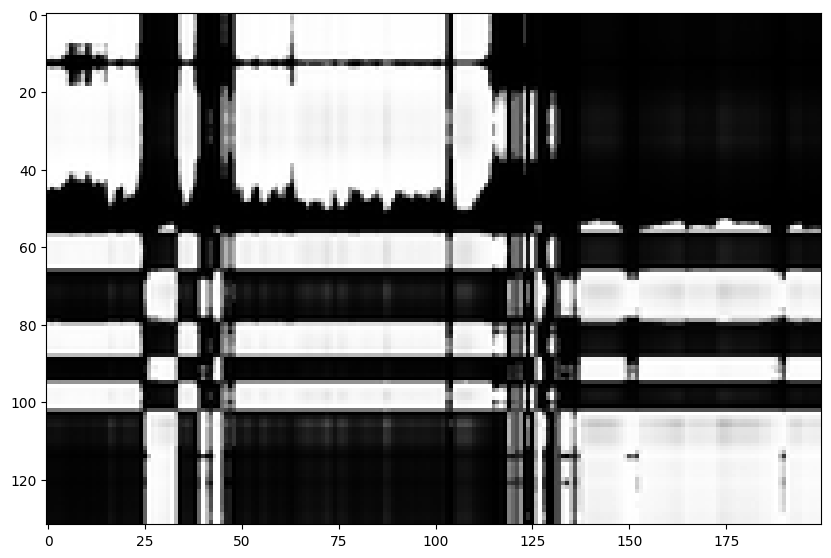

In [36]:
k = 1
print(np.shape(U[:,:k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m, n = np.shape(imMatrix)
partial, total = k*(m+n)*k, m*n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial/total)

size = (200, 200)
imtemp = lambda k: (np.vstack(U[:,k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im, cmap='gray')
  plt.show()

### 5) Âi 시각화

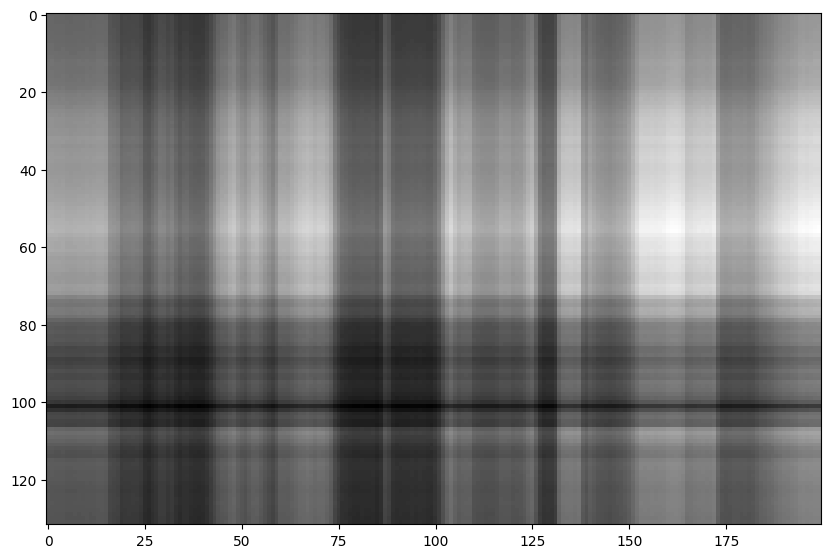

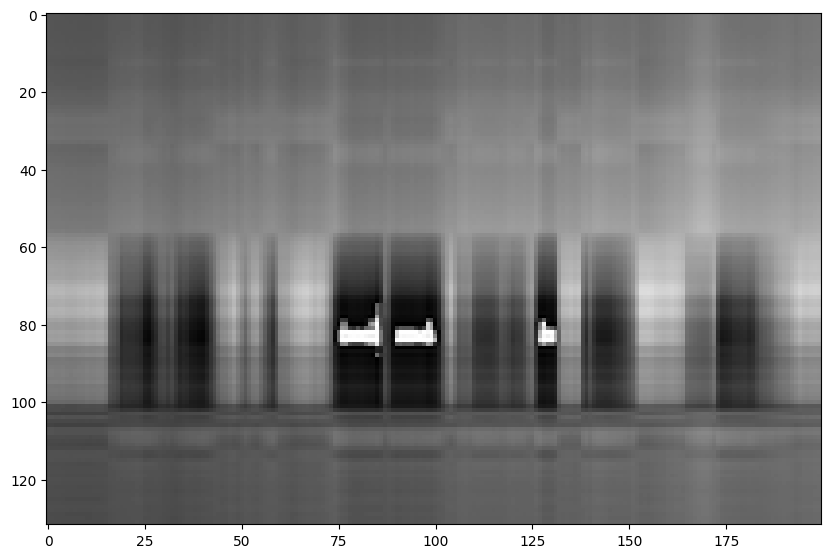

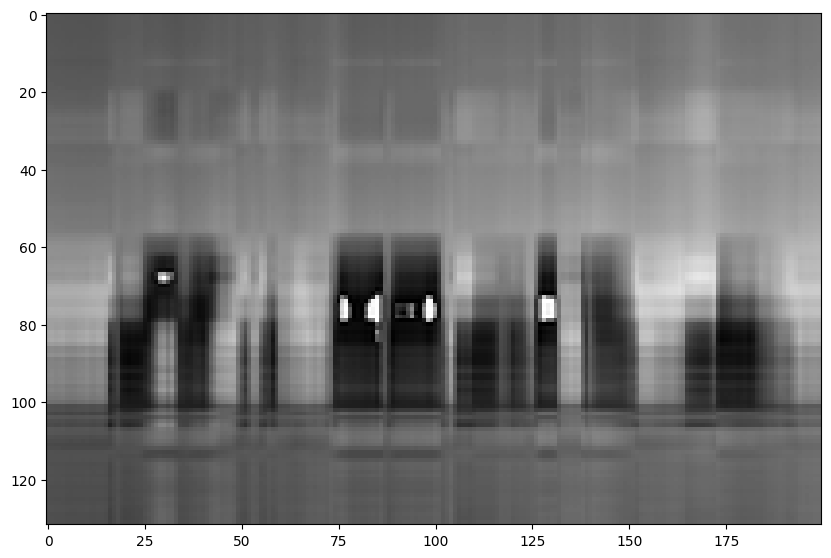

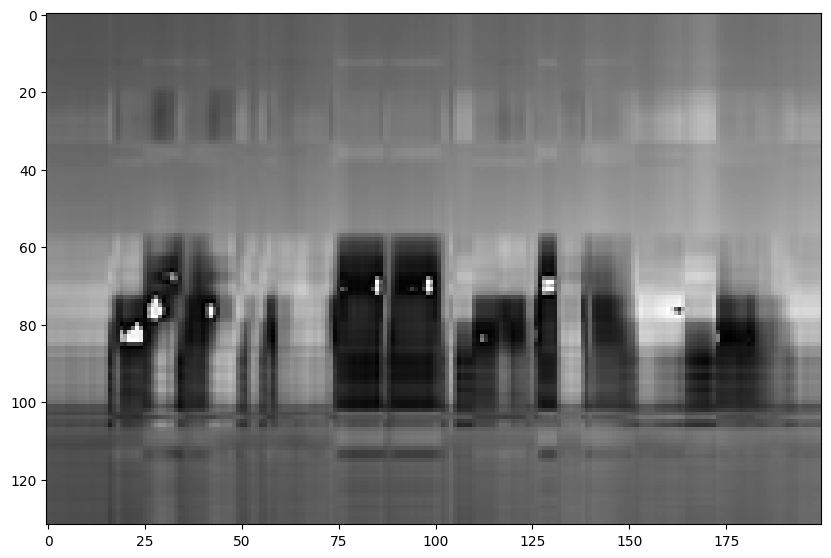

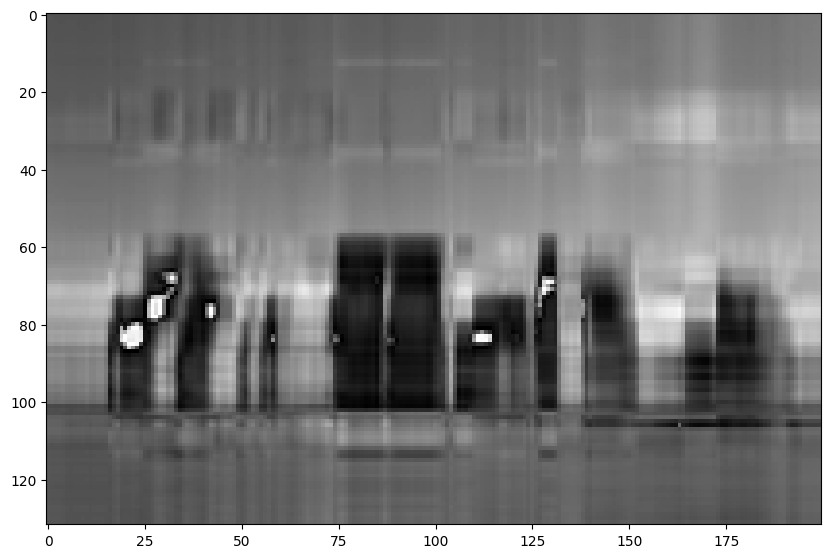

In [38]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:, :quality])
np.shape(V[:quality, :])

k = quality
m, n= np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]]
partial, total, partial/total

imtemp = lambda k: (U[:, :k]@np.diag(S[:k])@V.T[:, :k].T)*255
for i in list(range(1,k+1)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im, cmap='gray')
  plt.show()